# ***import numpy, scikit learn, matplotlib, seaborn and pandas***

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# ***Read CSV file***

In [65]:
data = pd.read_csv("C:\\insurance.csv")

# ***Check data***

In [66]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [67]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# ***Data overview***

In [68]:
data.shape

(1338, 7)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# ***Statistical summary***

In [70]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [71]:
# Summary statistics for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nValue Counts for Categorical Columns:")
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(data[col].value_counts())


Value Counts for Categorical Columns:

Column: sex
sex
male      676
female    662
Name: count, dtype: int64

Column: smoker
smoker
no     1064
yes     274
Name: count, dtype: int64

Column: region
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


# ***Check for messing data***

In [72]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# ***Check duplicates***

In [73]:
data.duplicated().sum()

1

# ***Handling duplicated values***

In [74]:
data = data.drop_duplicates()

In [75]:
data.duplicated().sum()

0

# ***4. Exploratory Data Analysis (EDA)***

In [76]:
pip install summarytools

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [77]:
from summarytools import dfSummary
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,age[int64],Mean (sd) : 39.2 (14.0)min < med < max:18.0 < 39.0 < 64.0IQR (CV) : 24.0 (2.8),47 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACXklEQVR4nO3cT27aQBiH4W9KCOaPbCEk2HGBSl2w9CF62B4hC07ADdghIQTCiYUx7qJCaSsVYruOfzbvs43GQaOXAY8YuyzLDFDxpe4XAPzu6dYfnXN9M3sueO1TlmVvBcfiQf0zSOdcfzKZfPd9f1zkwofDYeec+0GUyOPWCvns+/44DMO3IAjiPBfd7/fecrkcb7fbZzMjSHzYzY9sM7MgCOLpdPpa4Nr9AmPw4LipgRSChBSChBSChBSChBSChBSChBSChBSChBSChBSChBSChBSChBSChBSChBSChBSChJS7vxhH9ThM966yINM07ZqZ75wrMrxVk3wLh+n+VEmQURR1kyT5Np/PO51OJ9cBMbNmTnKJVc4fjUbTMAwPHKarKMjT6fTked5gsVjEs9lsl2dsEye5zCqXJImXpunXXq/3wmG6ir9DDofDRzmxWPjI8Hq9Hq9Wq8H5fO5U9eKapHU3NXXeIBQ5Mrzb7Wp78yneTLUqSG4QPk51rloVpPG0jTwk56ptQZoZT9vIQ22uWhnkIymx3+tfLpduDf/X7Mb3T8kg65rkpimz33vdborj+MXMcq2QVe4zywVZ1yQ3UZn93jLbTVXuM8sFWdckmzV3ZS6y3/s/tpuq2GeWC/LqsyeZlVmDbJCfrc6VGe8I8i91ffzhF36gCykECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSl3HxSw3++9vBc9Ho+emVkURd5msxkwlrFX93r6Cb5xtK2GD1U3AAAAAElFTkSuQmCC"">",0(0.0%)
2,sex[object],1. male2. female,675 (50.5%)662 (49.5%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABN0lEQVR4nO3bwYnDMBRF0a8gwmQjYQwuxkVMsSlC3RhjLZKQjWYxDcR/8YTIPRV8zMWQ4BdaawYoBDO7mdm19yEDerfWnr2PGEmc5/k3pTT1PmQ0tdY9hHAnuM/FlNK0rusz5/zqfcwojuP4KaVM27ZdzYzYPhTNzHLOr2VZHr2PGcyt9wGjufQ+AN+D2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGmWj2/zFg70NGwvPyibXWvZQyGR8DnlJr3c3s3fuOkTB48WPwclJgygcV3mw+vNUcmPI5MOPzYcp3EjM+P6Z8Pvxyd+BPXcgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggw5TvJJ6VH1M+B2Z8PgxefBi8OPwBCltq31np+ZoAAAAASUVORK5CYII="">",0(0.0%)
3,bmi[float64],Mean (sd) : 30.7 (6.1)min < med < max:16.0 < 30.4 < 53.1IQR (CV) : 8.4 (5.0),548 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACV0lEQVR4nO3bwYraQBzH8f/UdYkKEbHozRco9ODRh+jD9hEq+AS+gTchSMTUYIzpoQvtFnaXjJPmt9nv5z6YwxfDZP7jqqoyQMWnth8A+NtD2w8QmnNuYGaPnssvVVWdQz4P6ulUkM65wXQ6/RbH8cRn/fF4PDjnvhNlezoVpJk9xnE8Wa1W5/F4nNdZmKZptNlsJkmSPJoZQbaka0Gamdl4PM5ns9lPj6WD4A+DWtjUQApBQkonX9m+yrLsm1nsnPNZzg49AIJ8kmVZvyiKr4vFotfr9WptiMzYoYdCkE8ul8tDFEXD5XKZz+fzQ5217NDDIch/jEYjdugtYlMDKQQJKQQJKQQJKQQJKQQJKZKffe6YaYxvt1s/9PPg/5EL8p6ZxqIoorIsv+R5/sPMfL4lomVyQdodM4273W6y3W6H1+u119TDoVmKQZqZ30zj4XDgtOSdY1MDKQQJKQQJKQQJKbKbmveGafMwCDIAps3DIcgAmDYPhyADYtr8fmxqIIUgIYUgIYUgIYUgIYUgIYUgIYUgIYUgIaWxkxouasFHI0FyUQu+mvqH5KIWvDQ6XMFFLdTFpgZSCBJSmIcUwPWHPwiyZVx/eI4gW8b1h+cIUgTXH35jUwMpBAkpBAkpBAkpBAkpBAkpBAkpBAkpr34YZ+pbX9fOwV8MkqlvfV08B3/tH5Kpb3FdPAd/8yybqW99vufgZVnGJva6Z7jig1J93RPkB3Xv6369Xs+SJPnsnDv6/PxLIb8ZZJqmUd1fO51OkZlZlmXRfr8fslZ3rY/z+dzYv+svSFme8aj5M/MAAAAASUVORK5CYII="">",0(0.0%)
4,children[int64],Mean (sd) : 1.1 (1.2)min < med < max:0.0 < 1.0 < 5.0IQR (CV) : 2.0 (0.9),6 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB5ElEQVR4nO3cwU7CQBRG4XulwWJiC8GwZMs7sPENfFi37mHPU7AhMsRYlEBdSAKaUG1N7J/M+bZkpixOIDMM42VZGqDiqu03AJxLql50956ZdRvO/V6WZdFwLCJ1MUh37w2Hw4csywZNJt5sNs/u/kiUqKPqE7KbZdlgOp0WeZ5v60waQkhns9lgtVp1zYwg8WuVX9lmZnmeb0ej0WuDuXsNxiByLGoghSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAh5cf/ZbeBK1ziJRckV7jETS5I4wqXqCkGaWZc4RIrFjWQQpCQQpCQQpCQIruoaQP7n+0jyCP2PzUQ5An7nwII8hv2P9vFogZSCBJSCBJSCBJSCBJSWGULYEP+hCBbxob8VwTZPjbkzxCkCDbkP7GogRSChBSChBSChBSChBSChBSChBSChBSChBSChBR+OoyY4ikjgozUX08ZrdfrF3d/MrNaB0KOLsZMkPFqfMpouVzezufz+/F4fNfpdGoHWXVk7scgQwhp3QeGENL9f

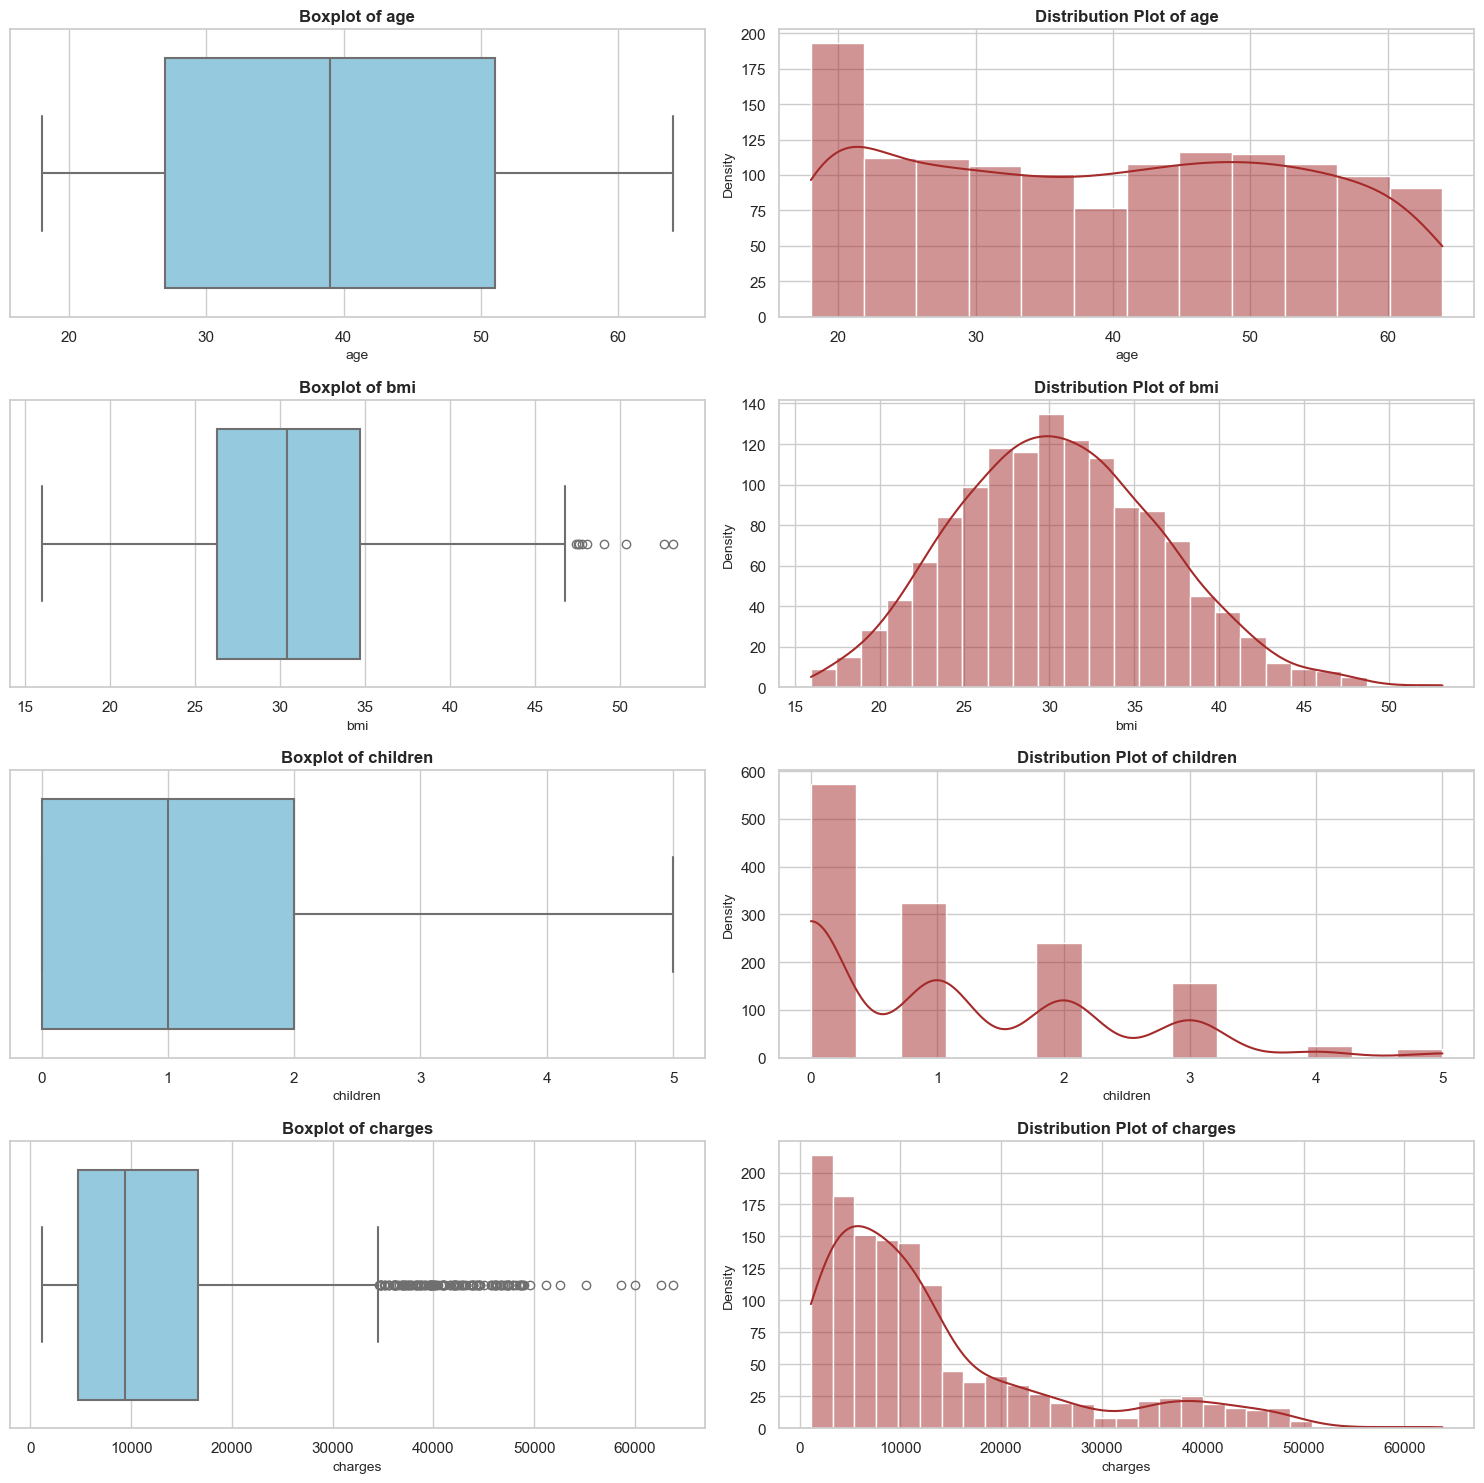

In [78]:
sns.set_theme(style="whitegrid", palette="pastel")
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 15))

for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 2, 2 * i + 1)
    sns.boxplot(data[col], orient='h', color="skyblue", linewidth=1.5)
    plt.title(f"Boxplot of {col}", fontsize=12, fontweight="bold")
    plt.xlabel(col, fontsize=10)

    plt.subplot(len(numerical_columns), 2, 2 * i + 2)
    sns.histplot(data[col], kde=True, color="brown", linewidth=1)
    plt.title(f"Distribution Plot of {col}", fontsize=12, fontweight="bold")
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Density", fontsize=10)

plt.tight_layout()
plt.show()


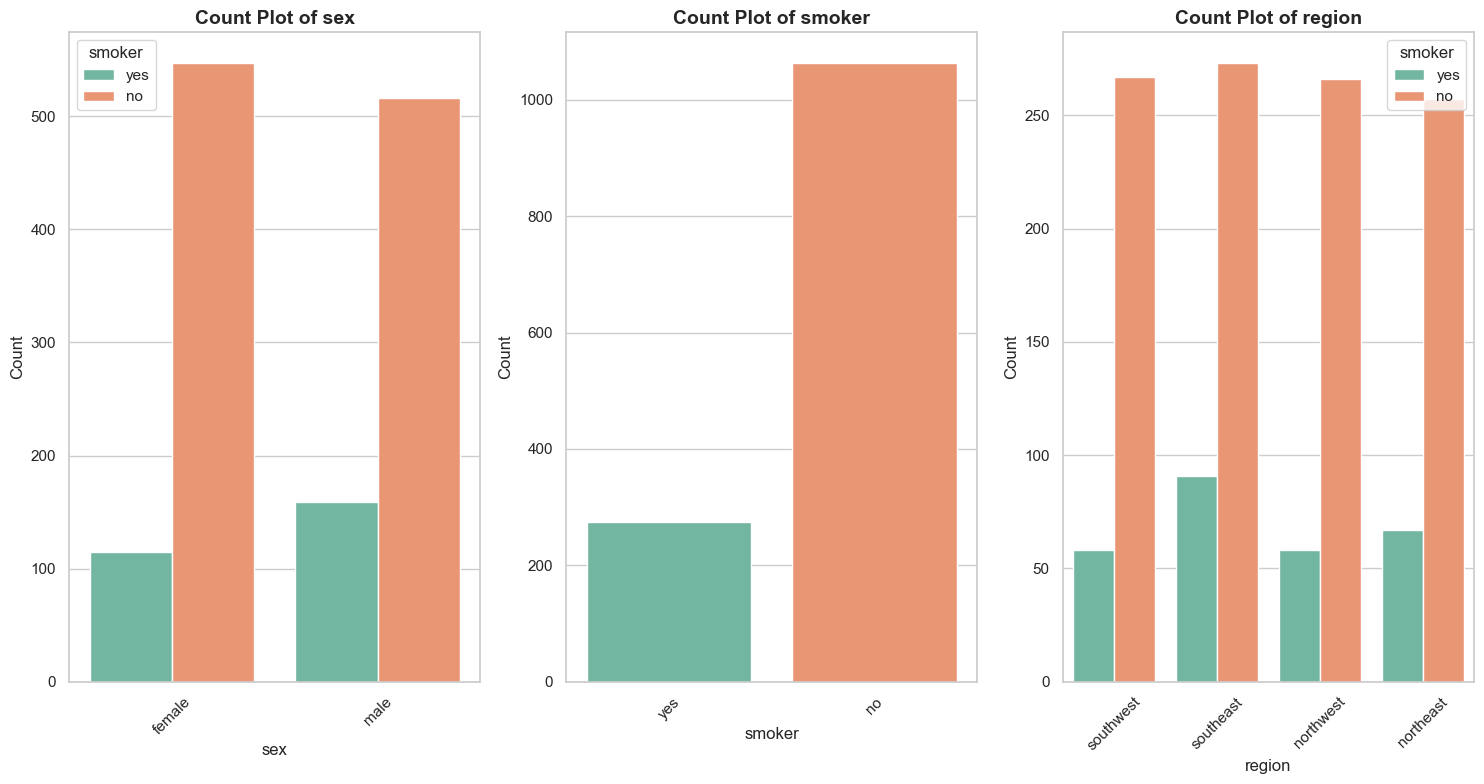

In [79]:
sns.set_theme(style="whitegrid", palette="pastel")
categorical_columns = data.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 8))  

for i, col in enumerate(categorical_columns):
    plt.subplot(1, len(categorical_columns), i + 1)
    sns.countplot(x=col, data=data, palette='Set2',hue='smoker')
    plt.title(f"Count Plot of {col}", fontsize=14, fontweight="bold")
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

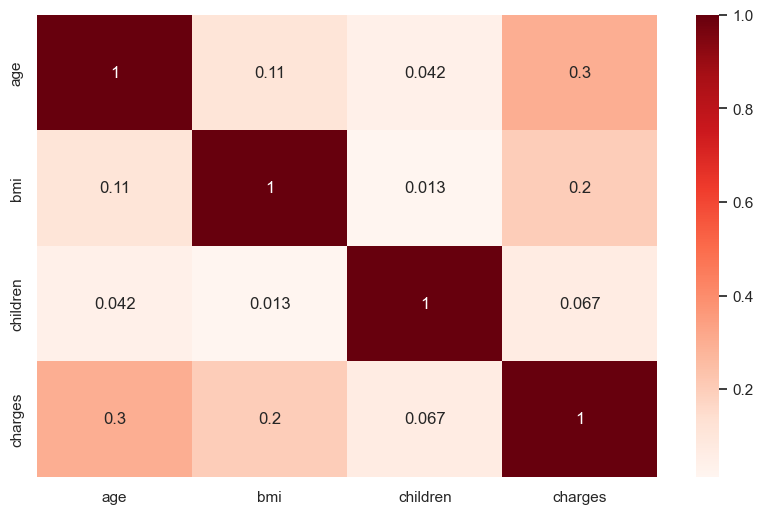

In [80]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, 6))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='Reds')
plt.show()

# ***Data Preprocessing***

## ***Handling Outliers***

In [81]:
def wisker(col):
    q1, q3 = np.percentile(col, [25, 75])  
    iqr = q3 - q1 
    lw = q1 - 1.5 * iqr  
    uw = q3 + 1.5 * iqr 
    return lw, uw

In [82]:
# Handling outliers for selected columns
for i in ['bmi', 'charges']:
    lw, uw = wisker(data[i])  
    print(lw,uw)
    data[i] = np.where(data[i] < lw, lw, data[i])  
    data[i] = np.where(data[i] > uw, uw, data[i])

13.674999999999994 47.31500000000001
-13120.716174999998 34524.777625


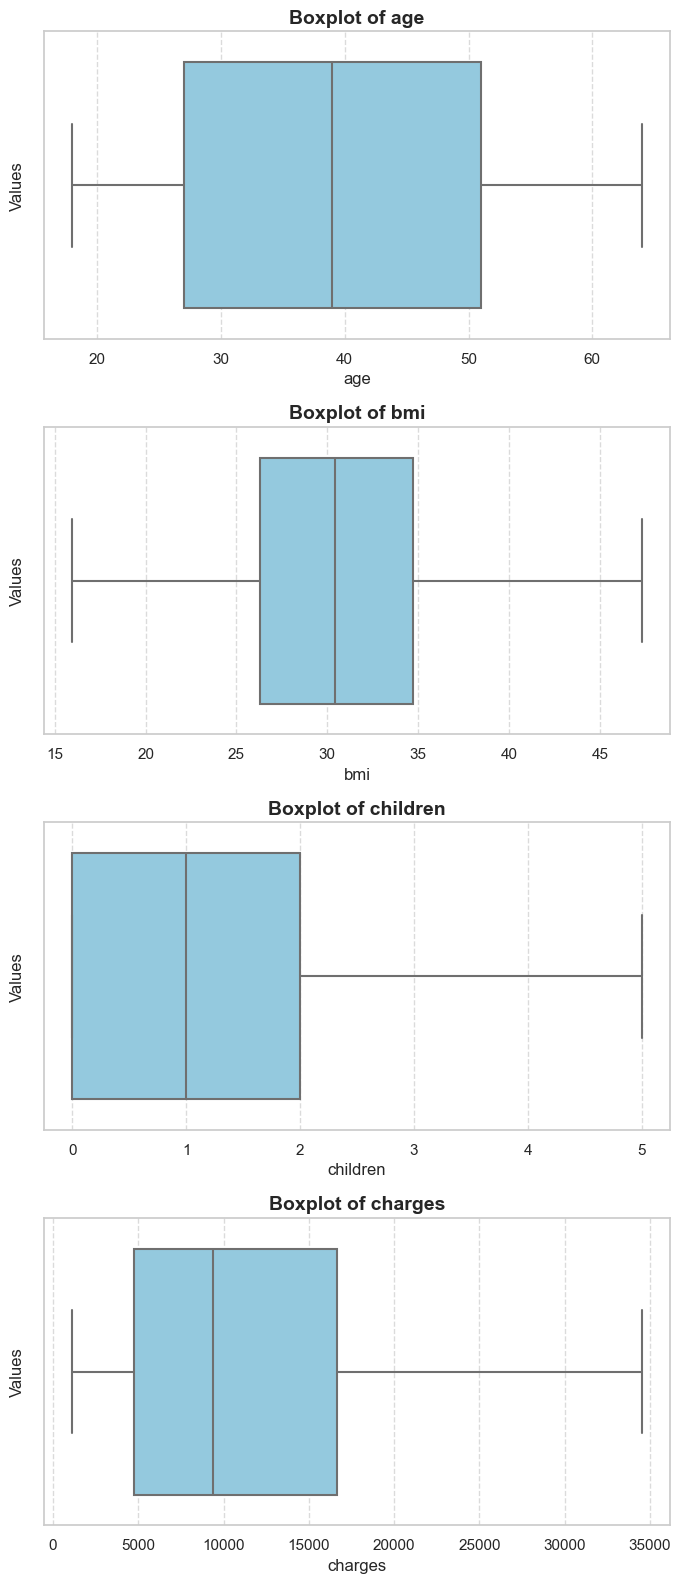

In [83]:
plt.figure(figsize=(7, len(numerical_columns) * 4))  

for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 1, i + 1)  
    sns.boxplot(x=data[col], orient='h', color="skyblue", linewidth=1.5)
    
    plt.title(f"Boxplot of {col}", fontsize=14, fontweight="bold")
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Values', fontsize=12)  
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## ***Data standardization***

In [84]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[["age", "charges"]])
print("Scaled Data:", scaled_data)

Scaled Data: [[-1.44041773  0.43238433]
 [-1.51164747 -1.05942878]
 [-0.79935006 -0.79137254]
 ...
 [-1.51164747 -1.06884834]
 [-1.29795825 -1.0316389 ]
 [ 1.55123139  1.63852353]]


In [101]:
data[["age_scaled","charges_scaled"]] = scaled_data
#data = data.drop(columns=["age","charges_scaled"])
print("Updated DataSet : ")
data.tail()

Updated DataSet : 


,age,sex,bmi,children,smoker,charges,age_scaled,charges_scaled,region_northeast,region_northwest,region_southeast,region_southwest
1333,50,1,30.97,3,0,10600.5483,0.767704,-0.186053,False,True,False,False
1334,18,0,31.92,0,0,2205.9808,-1.511647,-1.012150,True,False,False,False
1335,18,0,36.85,0,0,1629.8335,-1.511647,-1.068848,False,False,True,False
1336,21,0,25.80,0,0,2007.9450,-1.297958,-1.031639,False,False,False,True
1337,61,0,29.07,0,1,29141.3603,1.551231,1.638524,False,True,False,False


## ***Encoding Categorical Features***

In [86]:
label_encoder = LabelEncoder()

data['sex'] = label_encoder.fit_transform(data['sex'])  
data['smoker'] = label_encoder.fit_transform(data['smoker'])  

In [87]:
data = pd.get_dummies(data, columns=['region'], drop_first=False)
data

,age,sex,bmi,children,smoker,charges,age_scaled,charges_scaled,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,-1.440418,0.432384,False,False,False,True
1,18,1,33.770,1,0,1725.55230,-1.511647,-1.059429,False,False,True,False
2,28,1,33.000,3,0,4449.46200,-0.799350,-0.791373,False,False,True,False
3,33,1,22.705,0,0,21984.47061,-0.443201,0.934224,False,True,False,False
4,32,1,28.880,0,0,3866.85520,-0.514431,-0.848706,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0.767704,-0.186053,False,True,False,False
1334,18,0,31.920,0,0,2205.98080,-1.511647,-1.012150,True,False,False,False
1335,18,0,36.850,0,0,1629.83350,-1.511647,-1.068848,False,False,True,False
1336,21,0,25.800,0,0,2007.94500,-1.297958,-1.031639,False,False,False,True


# ***Splitting the Dataset***

In [102]:
X=data.drop(['charges_scaled','charges'],axis=1)
y=data['charges_scaled']

In [103]:
X

,age,sex,bmi,children,smoker,age_scaled,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,-1.440418,False,False,False,True
1,18,1,33.770,1,0,-1.511647,False,False,True,False
2,28,1,33.000,3,0,-0.799350,False,False,True,False
3,33,1,22.705,0,0,-0.443201,False,True,False,False
4,32,1,28.880,0,0,-0.514431,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0.767704,False,True,False,False
1334,18,0,31.920,0,0,-1.511647,True,False,False,False
1335,18,0,36.850,0,0,-1.511647,False,False,True,False
1336,21,0,25.800,0,0,-1.297958,False,False,False,True


In [104]:
y

0       0.432384
1      -1.059429
2      -0.791373
3       0.934224
4      -0.848706
          ...   
1333   -0.186053
1334   -1.012150
1335   -1.068848
1336   -1.031639
1337    1.638524
Name: charges_scaled, Length: 1337, dtype: float64

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# ***Model Building and Evaluatin***

## ***Linear Regression Model***

In [106]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [107]:
y_pred = model.predict(X_test)

In [108]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 0.20245374900771465
Root Mean Squared Error (RMSE): 0.44994860707386863
R-squared (R²): 0.8210971615394597


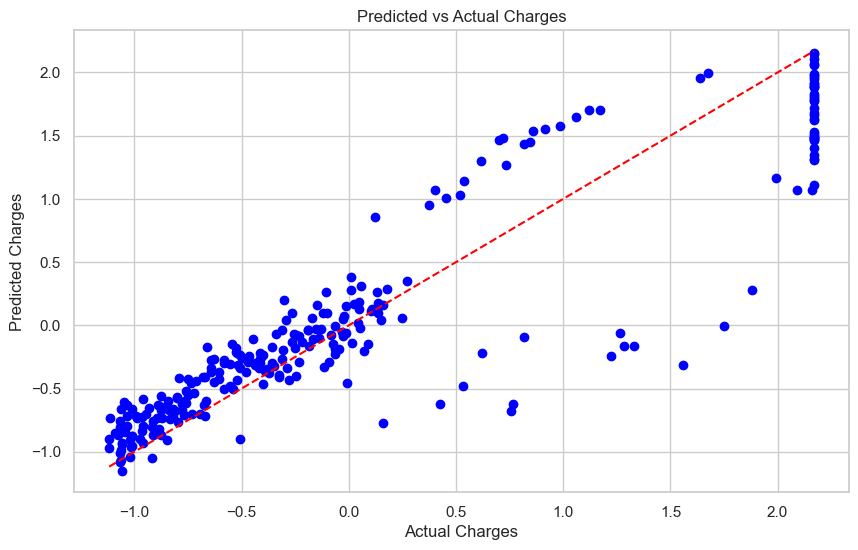

In [109]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.title('Predicted vs Actual Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

## ***Lasso Regression Model***

In [110]:
lasso = Lasso(0.01)
lasso.fit(X_train,y_train)

Lasso(alpha=0.01)

In [111]:
y_pred = lasso.predict(X_test)

In [113]:
mse = mean_squared_error(y_test,y_pred)
print(f'Mean squared Error (MSE):{mse}')

rmse = np.sqrt(mse)
r = r2_score(y_test,y_pred)
print(f'Root Squared Error (RMSE): {rmse}')
print(f'R-squared {r}')

Mean squared Error (MSE):0.21062507354312734
Root Squared Error (RMSE): 0.4589390738901269
R-squared 0.8138763856312206


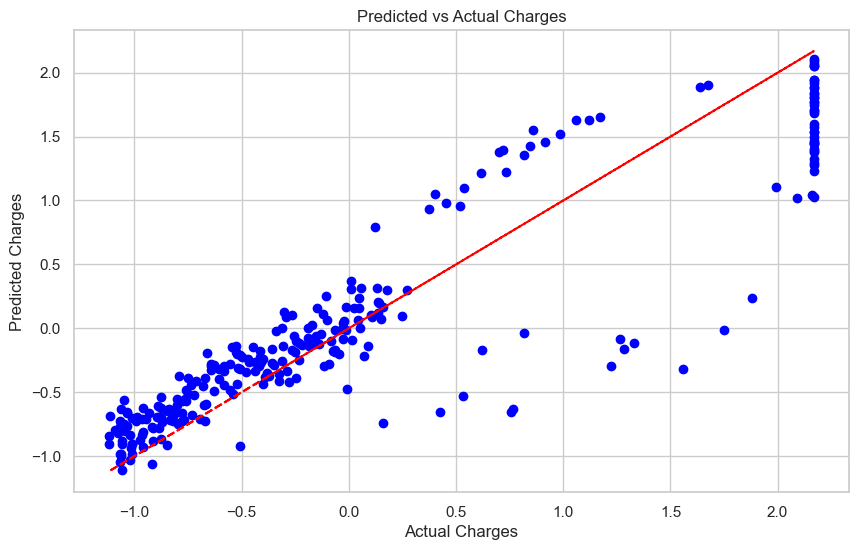

In [115]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red', linestyle='--')  # Perfect prediction line
plt.title('Predicted vs Actual Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

## ***Ridge Regression Model***

In [122]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_train,y_train)

Ridge(alpha=0.01)

In [123]:
y_pred = ridge.predict(X_test)

In [127]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r = r2_score(y_test,y_pred)
print(f'Mean squared Error (MSE):{mse}')
print(f'Root Squared Error (RMSE): {rmse}')
print(f'R-squared {r}')

Mean squared Error (MSE):0.20246029559314044
Root Squared Error (RMSE): 0.4499558818296972
R-squared 0.8210913765010466


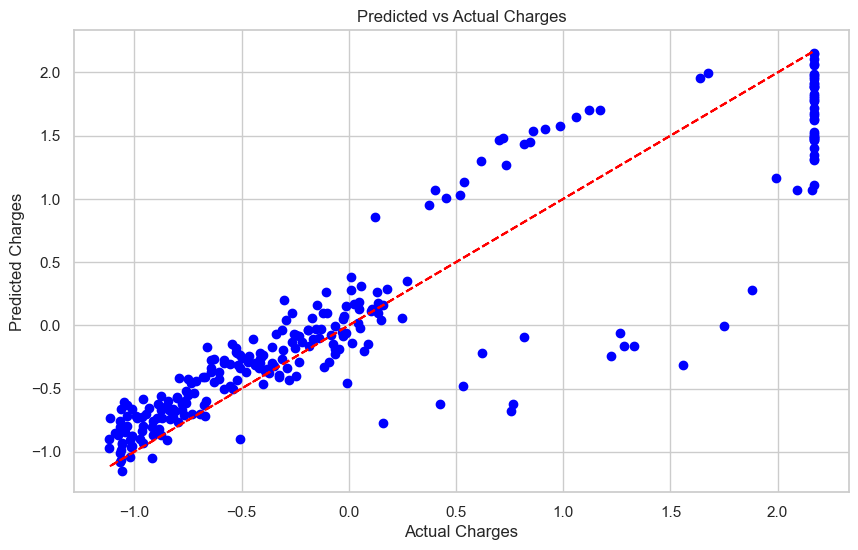

In [125]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red', linestyle='--')  # Perfect prediction line
plt.title('Predicted vs Actual Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

# ***Model Performance***

### ***I evaluated three models: Linear Regression, Lasso Regression, and Ridge Regression. All models showed good performance, with Linear and Ridge Regression having similar results: an R² of about 82%, meaning they explained 82% of the variance in the target variable. Lasso Regression performed slightly worse, with an R² of 81%, due to its feature selection process. The Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) were also low for all models, indicating that the predictions were close to the actual values. Overall, the models performed well, with Linear and Ridge Regression being the best in this case.***